## Overfitting Vs Underfitting

Overfitting happens when the model is too complex relative to the
 amount and noisiness of the training data. The possible solutions
 are:

 • To simplify the model by selecting one with fewer parameters
 (e.g., a linear model rather than a high-degree polynomial
 model), by reducing the number of attributes in the training
 data or by constraining the model

 • To gather more training data

 • To reduce the noise in the training data (e.g., fix data errors
 and remove outliers)

As you might guess, underfitting is the opposite of overfitting: it occurs when your
 model is too simple to learn the underlying structure of the data.

 The main options to fix this problem are:

 • Selecting a more powerful model, with more parameters

 • Feeding better features to the learning algorithm (feature engineering)

 • Reducing the constraints on the model (e.g., reducing the regularization hyper
parameter)

## Decision Trees

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [129]:
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target


In [130]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

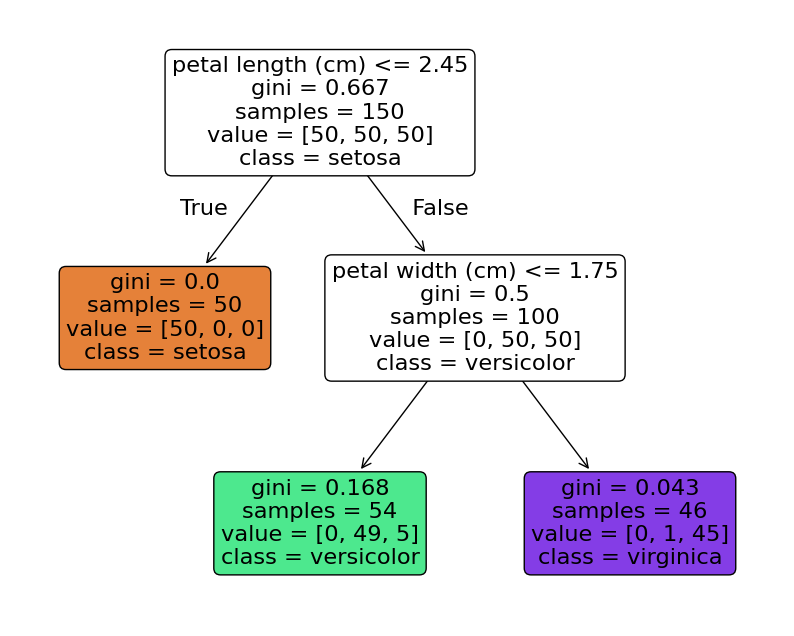

In [131]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(clf,
          feature_names=[iris.feature_names[2], iris.feature_names[3]],
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

gini score = 1 – [(0/54)^2 – (49/54)^2 – (5/54)^2]

             ≈ 0.168.

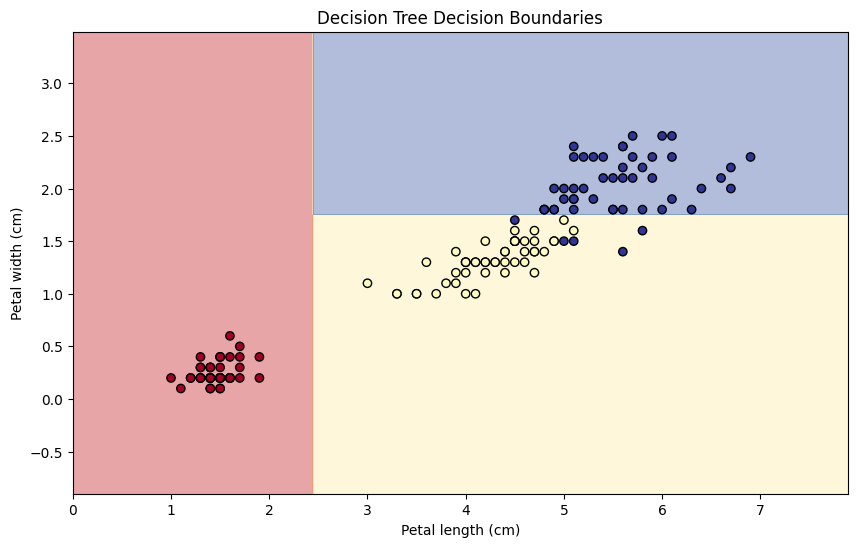

In [132]:
X = iris.data[:, [2, 3]]
y = iris.target

# Set the plotting range slightly beyond min and max values of petal length and width
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a dense grid of points that spans the feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid using the trained classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape predictions to match the shape of the grid (for plotting)
Z = Z.reshape(xx.shape)

# Set up the plot dimensions
plt.figure(figsize=(10, 6))

# Draw filled contours to show decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Overlay actual data points on top of the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)

# Label axes and give the plot a title
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title("Decision Tree Decision Boundaries")

# Display the final plot
plt.show()


In [133]:
clf.predict_proba([[5, 2.5]])

array([[0.        , 0.02173913, 0.97826087]])

In [134]:
clf.predict([[5, 2.5]])

array([2])

In [135]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Regularization Hyperparameters

max_depth , min_samples_split (the minimum number of sam
ples a node must have before it can be split), max_features
 (maximum number of features that are evaluated for splitting at each node)

? Why

to prevent overfitting

Decision Regression :

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(200, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(200) * 0.1

# Training a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)




DecisionTreeRegressor(max_depth=2)

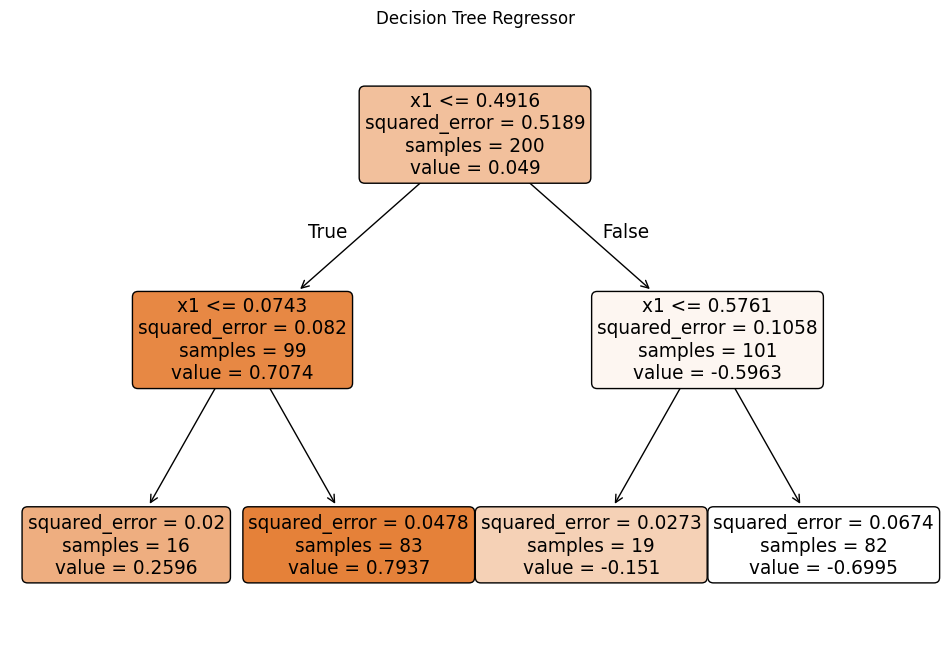

In [137]:
# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, filled=True, rounded=True, feature_names=["x1"], precision=4)
plt.title("Decision Tree Regressor")
plt.show()

If x1 is less than or equal to 0.5761, predict a value of -0.5963. Otherwise, predict a value of -0.6995.

The decision tree is making predictions based on the values of x1. The squared_error metric indicates the model's performance at each node. The value at each leaf node represents the final prediction.

Lower squared error = better prediction precision within that subset.